In [1]:
import sys
sys.path.extend(["../"])
import numpy as np
import matplotlib.pyplot as plt

import imageio.v2 as imageio
import tempfile
from IPython.display import Markdown, display, Video
from io import BytesIO
import os

from utils import Arrow3D

# Critical points of functions

We know from highschool that obtaining the minimums or maximums (known as critical points) of a function can be done by solving the system of equations that results from finding the variable values that make the gradient 0. A function can have one or more than one of these points. We also have saddle points, which are points where the gradient is also 0 but they are not minimum nor maximums.

Determine if a point is a minimum, a maximum or a saddle point is done through the second derivative information, contained in the Hessian for multivariate functions, and in the standard second derivative for univariate functions.

In other words, given $f: \mathbb{R}^N \to \mathbb{R}$ (when the image is a vector the concept of minimum is not defined in the same way, at least with my knowledge) a critical point is given by solving:

\begin{split}
\nabla_x f(x) = 0
\end{split}

In functions $f:\mathbb{R}\to \mathbb{R}$, the second derivative tell us whether is a minimum a maximum. There are no saddle points in these cases and they are named inflection points (points where curvature changes). When the second derivative is possitive we have a minimum, when is negative a maximum and when is 0 we need further analysis. 

In multivariate function we need to obtain the Hessian. When the hessian is positive definite (all eigenvalues are positive at the point), we have a local minimum. When the hessian is negative definite (all eigenvalues are negative) we have a maximum. When it has both positive and negative eigenvales, then it is a saddle point. 

When we have $f:\mathbb{R}^2 \to \mathbb{R}$ then the determinant can be used to obtain this information.

### $f:\mathbb{R} \to \mathbb{R}$

Let's visualize some examples. 


Text(0.5, 1.0, '$x^4 - 2 x^2$')

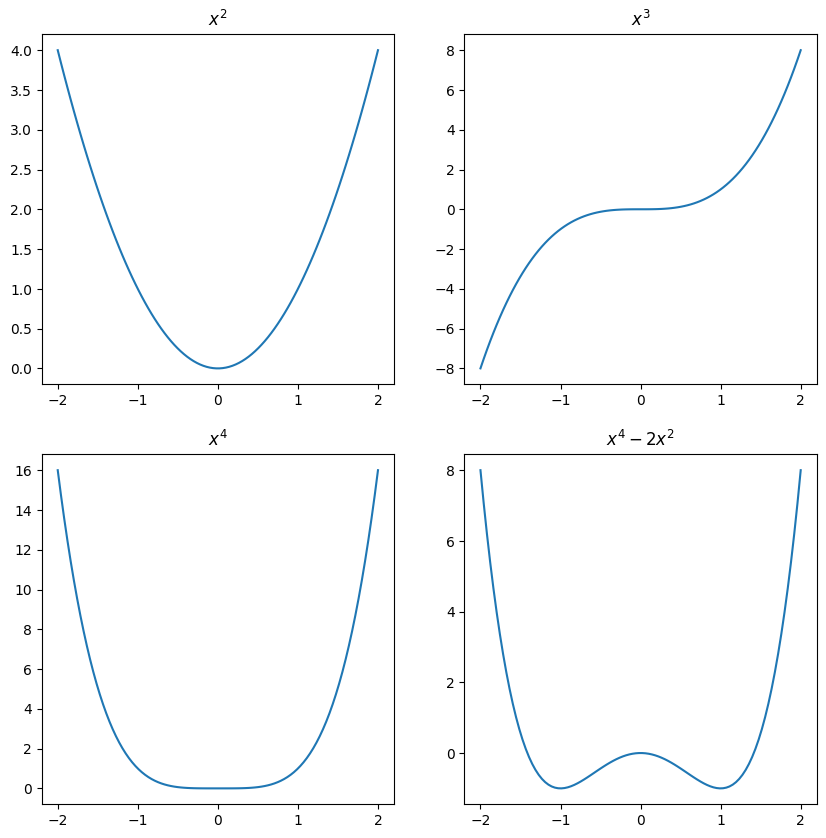

In [2]:
N_grid = 100
min_x = -2
max_x = 2
x_grid = np.linspace(min_x,max_x,N_grid)

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize = (10,10))

ax1.plot(x_grid, x_grid**2)
ax1.set_title(f"$x^2$")

ax2.plot(x_grid, x_grid**3)
ax2.set_title(f"$x^3$")

ax3.plot(x_grid, x_grid**4)
ax3.set_title(f"$x^4$")

ax4.plot(x_grid, x_grid**4 - 2*x_grid**2 )
ax4.set_title(f"$x^4 - 2 x^2$")

For each of these cases we have:

#### $x^2$

derivative: $2x$

critical point: $2x = 0 \to x = 0$

second derivative: $2>0 \to $ minimum 

#### $x^3$

derivative: $3x^2$

critical point: $3x^2 = 0 \to x = 0$

second derivative: $6x$. At $x=0$ the value is $0$ hence identifying as inflection point, a change of curvature. It is negative for values $x<0$ and positive for the rest, which implies a change of curvature at that point but not a minimum or maximum. 

#### $x^4$

derivative: $4x^3$

critical point: $4x^3 \to x = 0$

second derivative: $12x^2 > 0 \to $ minimum.

#### $x^4 - 2x^2$

derivative: $4x^3-4x$

critical point: $4x^3-4x = 0 \to x = 0, x = 1, x = -1$

second derivative: $12x^2 -4$. Giving values we have: 

\begin{split}
12x^2 -4 < 0, x = 0 \to \text{maximum}\\
12x^2 -4 > 0, x = -1 \to \text{minimum}\\
12x^2 -4 > 0, x = 1 \to \text{minimum}
\end{split}


### $f:\mathbb{R}^2 \to \mathbb{R}$

Let's now visualize some multidimensional functions.


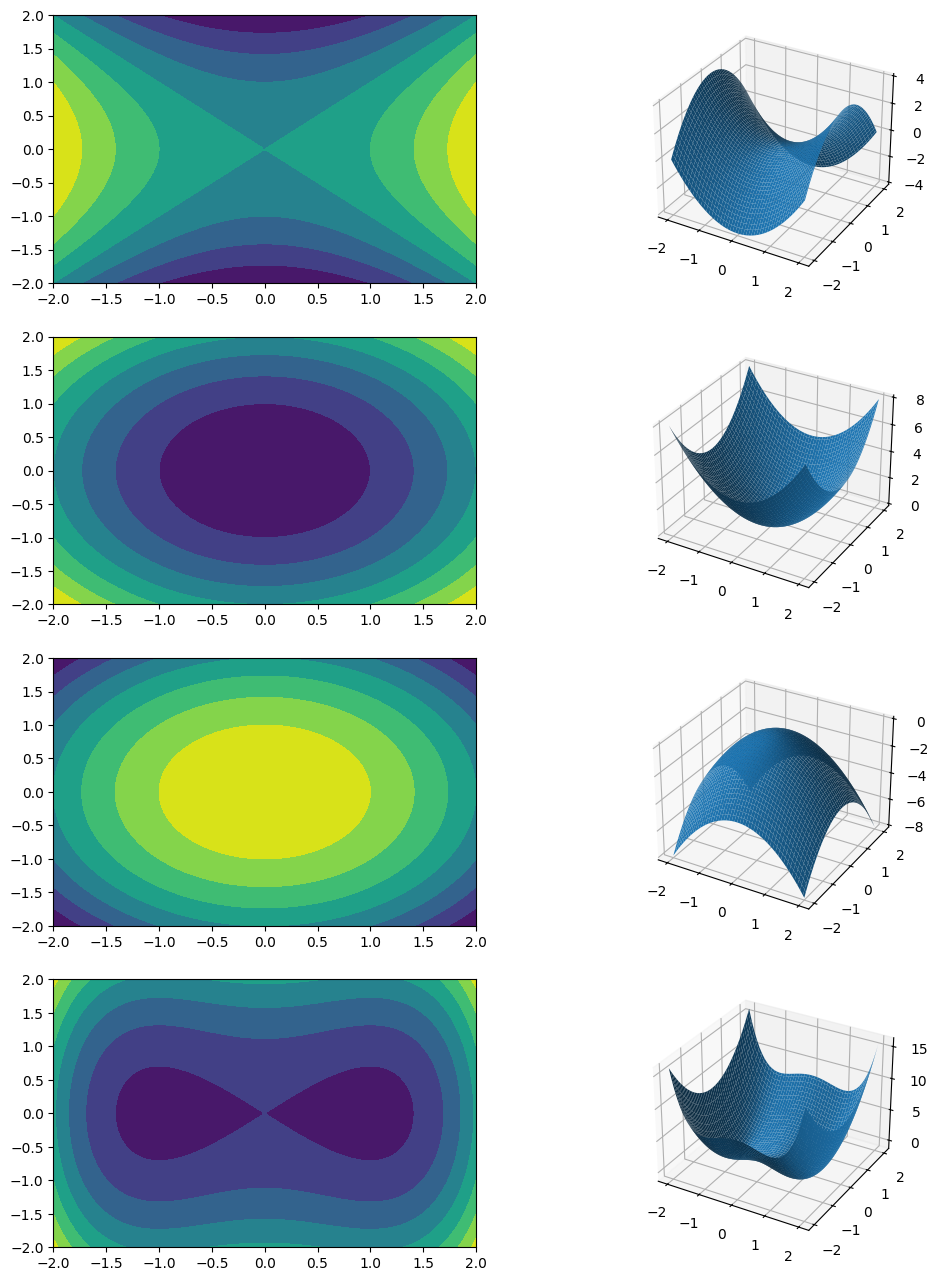

In [3]:
def fun1(x,y):
    return x**2 - y**2

def fun2(x,y):
    return x**2 + y**2

def fun3(x,y):
    return -x**2 - y**2

def fun4(x,y):
    return x**4 -2*x**2 + 2*y**2


## define grid
N_grid = 100
min_x = -2
max_x = 2
min_y = -2
max_y = 2

x_grid = np.linspace(min_x,max_x,N_grid)
y_grid = np.linspace(min_y, max_y, N_grid)

X_mesh, Y_mesh = np.meshgrid(x_grid, y_grid)

## define plot
fig = plt.figure(figsize=(12, 16))
ax_list = []

for i in range(4):
    ax1 = fig.add_subplot(4, 2, 2*i+1)
    ax2 = fig.add_subplot(4, 2, 2*i+2, projection='3d')
    
    ax_list.append([ax1,ax2])

# define set of func to show
funcs = [fun1, fun2, fun3, fun4]

for i in range(4):
    ax1,ax2 = ax_list[i]
    
    Z_mesh = funcs[i](X_mesh,Y_mesh)
    
    ax1.contourf(X_mesh,Y_mesh,Z_mesh)
    ax2.plot_surface(X_mesh,Y_mesh,Z_mesh)
    

## Gradient descent

Gradient descent is an optimization technique to find minimums or maximums in a mathematical function through a numerical approximation. It is widely used within the machine learning community and is the basic for more advances optimization techniques.

It turns out that some functions have maximums or minimums that cannot be obtained analytically. This implies that although, for example the minimum exists and we can conclude it is a minimum, we cannot solve the resulting equations or system of equations.

For example in $f : \mathbb{R} \to \mathbb{R}$  the function:

\begin{split}
f(x) = x^2 + e^x
\end{split}

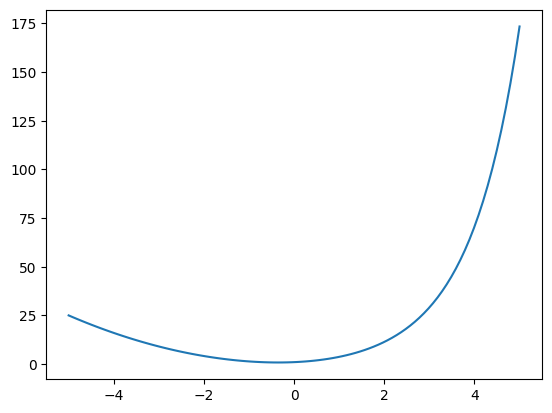

In [4]:
N_grid = 100
min_x = -5
max_x = 5
x_grid = np.linspace(min_x,max_x,N_grid)

plt.plot(x_grid, x_grid**2 + np.exp(x_grid))

The first derivative is given by:
   
\begin{split}
2x + e^x = 0
\end{split}

does not have solution in closed form (or at least I do not know how to obtain it). The second derivative:

\begin{split}
2 + e^x > 0
\end{split}

is always positive for any value of $x$, guaranteeing that the critical point is a minimum.

The existence of the minimum can be shown because when $x$ goes to minus or plus infinity, the function always increases, and never descreases at any point.
    

In arbitrary dimensions  $f : \mathbb{R}^2 \to \mathbb{R}$  the function:

\begin{split}
f(x) = x^2 + e^x + y^2
\end{split}

has the same property.

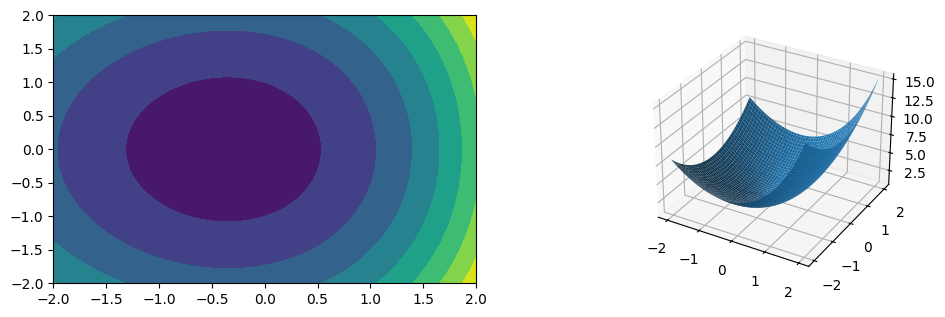

In [5]:
def fun1(x,y):
    return x**2 + np.exp(x) + y**2

## define grid
N_grid = 100
min_x = -2
max_x = 2
min_y = -2
max_y = 2

x_grid = np.linspace(min_x,max_x,N_grid)
y_grid = np.linspace(min_y, max_y, N_grid)

X_mesh, Y_mesh = np.meshgrid(x_grid, y_grid)

## define plot
fig = plt.figure(figsize=(12, 16))
ax_list = []

for i in range(1):
    ax1 = fig.add_subplot(4, 2, 2*i+1)
    ax2 = fig.add_subplot(4, 2, 2*i+2, projection='3d')
    
    ax_list.append([ax1,ax2])

# define set of func to show
funcs = [fun1]

for i in range(1):
    ax1,ax2 = ax_list[i]
    
    Z_mesh = funcs[i](X_mesh,Y_mesh)
    
    ax1.contourf(X_mesh,Y_mesh,Z_mesh)
    ax2.plot_surface(X_mesh,Y_mesh,Z_mesh)
    

Numerical optimization are a set of techniques designed to find minimums and maximums when exact computation is not possible or computationlly expensive.

The most simple and widely adopted method for numerical optimization is what is called gradient descent. The idea is to find the minimum of a function by starting from a point and take steps in the direction of the gradient.

Suppose we are at any point from our previous function.

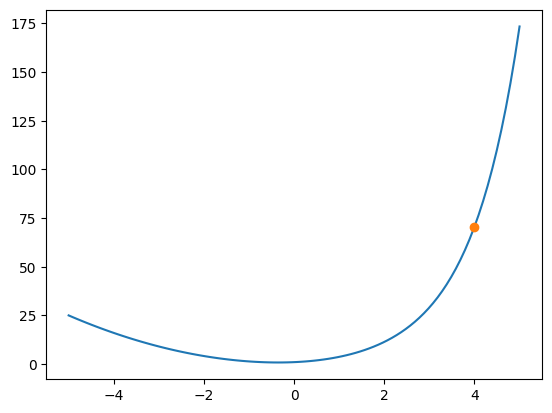

In [6]:
def fun(x):
    return x**2 + np.exp(x)

N_grid = 100

min_x = -5
max_x = 5
x_grid = np.linspace(min_x,max_x,N_grid)

x_init = 4

plt.plot(x_grid, fun(x_grid))
plt.plot(x_init, fun(x_init),'o', color = 'C1')

By definition, we now that the gradient or derivative at a point, is the tangent function at that point, where the slope is the actual derivative. In other words:

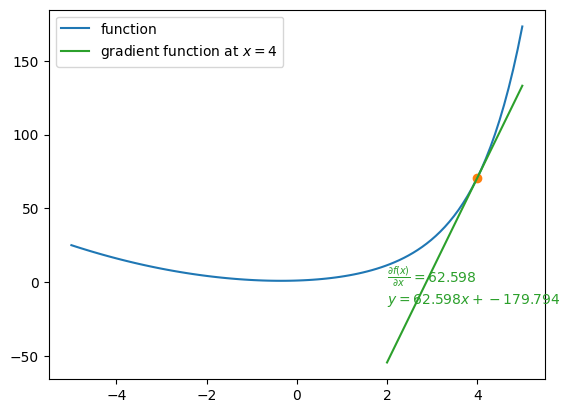

In [7]:
def fun(x):
    return x**2 + np.exp(x)

def grad_f(x):
    return 2*x + np.exp(x)

N_grid = 100

min_x = -5
max_x = 5
x_grid = np.linspace(min_x,max_x,N_grid)

min_grad = 2
max_grad = 5
grad_grid = np.linspace(min_grad,max_grad,N_grid)

x_init = 4
grad_init = grad_f(x_init)
fun_init = fun(x_init)

## get the gradient function at the point x_init (tangent at the point)
gradient_function_x_at_current_x = grad_init * grad_grid + fun_init - grad_init * x_init

plt.plot(x_grid, fun(x_grid), label = 'function')
plt.plot(x_init, fun(x_init),'o', color = 'C1')
plt.plot(grad_grid, gradient_function_x_at_current_x, color = "C2", label = f'gradient function at $x={x_init}$')
plt.text(2,-15, f'$\\frac{{\partial f(x)}}{{\partial x}} = {grad_init:.3f}$\n$y = {grad_init:.3f}x+{fun_init - grad_init * x_init:.3f}$', color = "C2")
plt.legend()

Since the direction of change of the curve goes up, the derivative is positive. In other words the slope of the tangent line is positive. We can see that the minimum is exactly in the opposite direction to the sign of the derivative. This means that if we iteratively follow the negative direction of the gradient, we can reach the minimum. This suggest the following algorithm to find minimums of functions:

* Take a initial guess for $x_t$.
* Repeat until the derivative is zero:

    * step 1: compute gradient of the function at $x_t$
    * step 2: get a new guess $x_{t+1} = x_t - \alpha \cdot \frac{\partial f(x_t)}{\partial x_t}$
    
The term $\alpha$ is refered as the learning rate and is the amount of the gradient considered in the update. Since gradient descent only uses the information of the gradient (which is the first order derivative) it is also known as a first order gradient based method. For some cases, optimal values for $\alpha$ exists which implies a single step can be reach the minimum. There are also multiple variants from this algorithm as well.

Note that the value of $\alpha$ is necessary because in the considered example at $x=4$ the gradient is $62.6$, so moving in the minux direction of the gradient this amount would lead to a point which is far from the minimum $4-62.6 \approx -58$, while the minimum is around $0$.

Let's visualize how gradient descent works.

In [8]:
## ===================
## computational graph
def fun(x):
    return x**2 + np.exp(x)

def grad_f(x):
    return 2*x + np.exp(x)

## ===================
## plot configurations
N_grid = 100

min_x = -6
max_x = 6
x_grid = np.linspace(min_x,max_x,N_grid)

min_grad = -5
max_grad = 5
grad_grid = np.linspace(min_grad,max_grad,N_grid)

## ======
## figure
fig, ax = plt.subplots(1,1, figsize = (5,5))

# Create temporary file for video creation
video_filename = "/tmp/aux.mp4"

## video writer
writer = imageio.get_writer(video_filename, format="FFMPEG", mode="I", fps=1, codec="libx264")

## ========
## initialization point and grad descent parameters
x = 5
lr = 0.01
epochs = 10

for e in range(epochs):
    
    ## compute gradient
    grad_x = grad_f(x)
    
    ## compute function 
    f_x = fun(x)

    ## get the gradient function at the point x_init (tangent at the point)
    gradient_function_x_at_current_x = grad_x * grad_grid + f_x - grad_x * x

    ## grad descent update
    x_n = x - lr * grad_x
    
    ## =============
    ## start display
    ax.clear()
    
    ax.set_xlim([-9,9])
    ax.set_ylim([-100,200])
    
    ## 1.
    ## display loss function and current point
    ax.plot(x_grid, fun(x_grid), label = 'function')
    ax.plot(x, -50,'*', color = 'C1')
    ax.text(x +0.5, -51 , f"x = {x:.2f}", fontsize=12, va='bottom', color = f"C1" , zorder = 50)
    ax.legend(loc = "upper right")

    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame)

    
    ## 2.
    ## display vertical line and current function value
    ax.vlines(x, ymin=-50, ymax=f_x, color='k', linestyles='dotted', zorder = -50)

    ## 3. display current loss
    ax.plot(x, f_x, 'o', color = 'C1', label = f'$f(x)$', zorder = 20)
    ax.text(x + 0.5, f_x , f"$f(x)={f_x:.3f}$", fontsize=12, va='bottom', color = "C0" , zorder = 50)
    ax.legend(loc = "upper right")
    

    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame) 
  
    
    ## 4 display tangent line
    ax.plot(grad_grid, gradient_function_x_at_current_x, color = "C2", label = f'gradient function at $x={x_init}$')
    symbol = " "
    if f_x - grad_x * x > 0:
        symbol = "+"
    ax.text(2,-15, f'$\\frac{{\partial f(x)}}{{\partial x}} = {grad_x:.3f}$\n$y = {grad_x:.3f}x{symbol}{f_x - grad_x * x:.3f}$', color = "C2")
    ax.legend(loc = "upper right")
    

    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame) 

    
    ## 5.
    ## display rest of lines to show update
    ax.hlines(y = f_x, xmin=x_n, xmax=x, color='k', linestyles='dotted', zorder = -50)
    ax.vlines(x_n, ymin=-51 , ymax=f_x, color='k', linestyles='dotted', zorder = -50)
    

    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame) 

    
    ## 6. display new point
    ax.plot(x_n, -55, '*', color = 'C3', label = r'updated value: $x_n = x - \alpha\cdot\frac{\partial f(x)}{\partial x}$', zorder = 200, markersize = 10)
    ax.text(x_n+0.5, -63, f"$x_n = {x:.2f} -{lr:.2f}*{grad_x:.2f} = {x_n:.2f}$", va='bottom', color = f"C3" , zorder = 200) 
    ax.legend(loc = "upper right")
    

    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame) 

    ax.set_title(f"$f(x)={f_x:.3f}$ \n $f(x_n) = {fun(x_n):.3f}$")
      
    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame) 

    # to repeat loop
    x = x_n
    
    
writer.close() 
plt.close()

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (500, 500) to (512, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


In [9]:
# Mostrar el video en Jupyter Notebook
display(Video(data=video_filename, embed=True))
os.remove(video_filename)

#### The role of the learning rate

Very big learning rates will make gradient descent not converge to the minimum. Very small learning rates will make convergence slow. The optimal learning rate depends on the curvature of the function. There are more advanced gradient descent methods which uses second order information to adjust the learning rate depending on the curvature. When the curvature is smaller, the learning rate may increase. These are known as second order methods. We will see that there are more sophisticated gradient descent methods which make use of some gradient statistics to improve convergence

In [10]:
## ===================
## computational graph
def fun(x):
    return x**2 

def grad_f(x):
    return 2*x 

## ===================
## plot configurations
N_grid = 100

min_x = -8
max_x = 8
x_grid = np.linspace(min_x,max_x,N_grid)

min_grad = -8
max_grad = 8
grad_grid = np.linspace(min_grad,max_grad,N_grid)

## ========
## initialization point and grad descent parameters
xs = [7,7,7,7,7]
lrs = [1.01,0.8,0.5,0.1,0.01]
epochs = 10

## ======
## figure
fig, axs = plt.subplots(len(lrs),1, figsize = (10,40))

# Create temporary file for video creation
video_filename = "/tmp/aux.mp4"

## video writer
writer = imageio.get_writer(video_filename, format="FFMPEG", mode="I", fps=1, codec="libx264")

for e in range(epochs):
    
    ## compute gradient
    grad_xs = []
    for x in xs:
        grad_xs.append( grad_f(x) )
    
    ## compute function 
    f_xs = []
    for x in xs:
        f_xs.append(fun(x))

    ## get the gradient function at the point x_init (tangent at the point)
    gradient_function_x_at_current_xs = []
    for f_x,x,grad_x in zip(f_xs,xs, grad_xs):
        gradient_function_x_at_current_xs.append(grad_x * grad_grid + f_x - grad_x * x)

    x_ns = []
    for lr,x,grad_x in zip(lrs,xs,grad_xs):
        ## grad descent update
        x_ns.append(x - lr * grad_x)
    
    ## =============
    ## start display
    for ax in axs:
        ax.clear()
    
        ax.set_xlim([-9,9])
        ax.set_ylim([-20,80])
    
    ## 1.
    ## display loss function and current point
    for x,ax in zip(xs,axs):
        ax.plot(x_grid, fun(x_grid), label = 'function')
        ax.plot(x, -5,'*', color = 'C1')
        ax.text(x +0.5, -6 , f"x = {x:.2f}", fontsize=12, va='bottom', color = f"C1" , zorder = 50)
        ax.legend(loc = "upper right")

    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame)

    ## 2.
    ## display vertical line and current function value
    for x,f_x,ax in zip(xs,f_xs,axs):
        ax.vlines(x, ymin=-6, ymax=f_x, color='k', linestyles='dotted', zorder = -50)
 
        ## 3. display current loss
        ax.plot(x, f_x, 'o', color = 'C1', label = f'$f(x)$', zorder = 20)
        ax.text(x + 0.5, f_x , f"$f(x)={f_x:.3f}$", fontsize=12, va='bottom', color = "C0" , zorder = 50)
        ax.legend(loc = "upper right")
    

    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame) 
  
    
    ## 4 display tangent line
    for ax,gradient_function_x_at_current_x,grad_x,f_x,x in zip(axs,gradient_function_x_at_current_xs,grad_xs,f_xs,xs):
        ax.plot(grad_grid, gradient_function_x_at_current_x, color = "C2", label = f'gradient function at $x={x}$')
        symbol = " "
        if f_x - grad_x * x > 0:
            symbol = "+"
        ax.text(2,-8, f'$\\frac{{\partial f(x)}}{{\partial x}} = {grad_x:.3f}$\n$y = {grad_x:.3f}x{symbol}{f_x - grad_x * x:.3f}$', color = "C2")
        ax.legend(loc = "upper right")
    
    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame) 

    
    ## 5.
    ## display rest of lines to show update
    for x,x_n,f_x,ax in zip(xs,x_ns,f_xs,axs):
        ax.hlines(y = f_x, xmin=x_n, xmax=x, color='k', linestyles='dotted', zorder = -50)
        ax.vlines(x_n, ymin=-10, ymax=f_x, color='k', linestyles='dotted', zorder = -50)
    

    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame) 

    
    ## 6. display new point
    for x,x_n,grad_x,lr,ax in zip(xs,x_ns,grad_xs,lrs,axs):
        ax.plot(x_n, -12, '*', color = 'C3', label = r'updated value: $x_n = x - \alpha\cdot\frac{\partial f(x)}{\partial x}$', zorder = 200, markersize = 10)
        ax.text(x_n+0.5, -14, f"$x_n = {x:.2f} -{lr:.2f}*{grad_x:.2f} = {x_n:.2f}$", va='bottom', color = f"C3" , zorder = 200) 
        ax.legend(loc = "upper right")
    

    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame) 

    
    for f_x,x_n,ax in zip(f_xs,x_ns,axs):
        ax.set_title(f"$f(x)={f_x:.3f}$ \n $f(x_n) = {fun(x_n):.3f}$")
      
    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame) 
    
    # to repeat loop
    xs = x_ns
    
writer.close() 
plt.close()

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1000, 4000) to (1008, 4000) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
[rawvideo @ 0x21e8ad00] Stream #0: not enough frames to estimate rate; consider increasing probesize


In [11]:
# Mostrar el video en Jupyter Notebook
display(Video(data=video_filename, embed=True))
os.remove(video_filename)

### Local optima

Gradient descent might not achieve global optimum, and thus reaching the optimum might depend upon initialization. 

Also, when there is more than one global optimum there is no guarantee to achieve it.

In [12]:
## ===================
## computational graph
def fun(x):
    return x**2 + 20*np.sin(x)

def grad_f(x):
    return 2*x + 20*np.cos(x)

## ===================
## plot configurations
N_grid = 100

min_x = -8
max_x = 8
x_grid = np.linspace(min_x,max_x,N_grid)

min_grad = -8
max_grad = 8
grad_grid = np.linspace(min_grad,max_grad,N_grid)

## ========
## initialization point and grad descent parameters
xs = [7]
lrs = [0.1]
epochs = 6

## ======
## figure
fig, axs = plt.subplots(len(lrs),1, figsize = (5,5))
if len(lrs) == 1:
    axs = [axs]

# Create temporary file for video creation
video_filename = "/tmp/aux.mp4"

## video writer
writer = imageio.get_writer(video_filename, format="FFMPEG", mode="I", fps=1, codec="libx264")

for e in range(epochs):
    
    ## compute gradient
    grad_xs = []
    for x in xs:
        grad_xs.append( grad_f(x) )
    
    ## compute function 
    f_xs = []
    for x in xs:
        f_xs.append(fun(x))

    ## get the gradient function at the point x_init (tangent at the point)
    gradient_function_x_at_current_xs = []
    for f_x,x,grad_x in zip(f_xs,xs, grad_xs):
        gradient_function_x_at_current_xs.append(grad_x * grad_grid + f_x - grad_x * x)

    x_ns = []
    for lr,x,grad_x in zip(lrs,xs,grad_xs):
        ## grad descent update
        x_ns.append(x - lr * grad_x)
    
    ## =============
    ## start display
    for ax in axs:
        ax.clear()
    
        ax.set_xlim([-9,9])
        ax.set_ylim([-20,80])
    
    ## 1.
    ## display loss function and current point
    for x,ax in zip(xs,axs):
        ax.plot(x_grid, fun(x_grid), label = 'function')
        ax.plot(x, -5,'*', color = 'C1')
        ax.text(x +0.5, -6 , f"x = {x:.2f}", fontsize=12, va='bottom', color = f"C1" , zorder = 50)
        ax.legend(loc = "upper right")

    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame)

    ## 2.
    ## display vertical line and current function value
    for x,f_x,ax in zip(xs,f_xs,axs):
        ax.vlines(x, ymin=-6, ymax=f_x, color='k', linestyles='dotted', zorder = -50)
 
        ## 3. display current loss
        ax.plot(x, f_x, 'o', color = 'C1', label = f'$f(x)$', zorder = 20)
        ax.text(x + 0.5, f_x , f"$f(x)={f_x:.3f}$", fontsize=12, va='bottom', color = "C0" , zorder = 50)
        ax.legend(loc = "upper right")
    

    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame) 
  
    
    ## 4 display tangent line
    for ax,gradient_function_x_at_current_x,grad_x,f_x,x in zip(axs,gradient_function_x_at_current_xs,grad_xs,f_xs,xs):
        ax.plot(grad_grid, gradient_function_x_at_current_x, color = "C2", label = f'gradient function at $x={x}$')
        symbol = " "
        if f_x - grad_x * x > 0:
            symbol = "+"
        ax.text(2,-8, f'$\\frac{{\partial f(x)}}{{\partial x}} = {grad_x:.3f}$\n$y = {grad_x:.3f}x{symbol}{f_x - grad_x * x:.3f}$', color = "C2")
        ax.legend(loc = "upper right")
    
    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame) 

    
    ## 5.
    ## display rest of lines to show update
    for x,x_n,f_x,ax in zip(xs,x_ns,f_xs,axs):
        ax.hlines(y = f_x, xmin=x_n, xmax=x, color='k', linestyles='dotted', zorder = -50)
        ax.vlines(x_n, ymin=-10, ymax=f_x, color='k', linestyles='dotted', zorder = -50)
    

    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame) 

    
    ## 6. display new point
    for x,x_n,grad_x,lr,ax in zip(xs,x_ns,grad_xs,lrs,axs):
        ax.plot(x_n, -12, '*', color = 'C3', label = r'updated value: $x_n = x - \alpha\cdot\frac{\partial f(x)}{\partial x}$', zorder = 200, markersize = 10)
        ax.text(x_n+0.5, -14, f"$x_n = {x:.2f} -{lr:.2f}*{grad_x:.2f} = {x_n:.2f}$", va='bottom', color = f"C3" , zorder = 200) 
        ax.legend(loc = "upper right")
    

    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame) 

    
    for f_x,x_n,ax in zip(f_xs,x_ns,axs):
        ax.set_title(f"$f(x)={f_x:.3f}$ \n $f(x_n) = {fun(x_n):.3f}$")
      
    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame) 
    
    # to repeat loop
    xs = x_ns
    
    
writer.close() 
plt.close()

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (500, 500) to (512, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


In [13]:
# Mostrar el video en Jupyter Notebook
display(Video(data=video_filename, embed=True))
os.remove(video_filename)

#### Optimal learning rate depends upon the curvature of the function.

Higher curvature requires smaller learning rate, while smaller curvature higher. This implies that we can only precompute an optimal learning rate for functions with constant curvature (quadratic ones).

In [14]:
## ===================
## computational graph
def fun(x):
    return x**4 

def grad_f(x):
    return 4*x**3

def grad2_f(x):
    return 12*x**2

## ===================
## plot configurations
N_grid = 100

min_x = -4
max_x = 4
x_grid = np.linspace(min_x,max_x,N_grid)

min_grad = -4
max_grad = 4
grad_grid = np.linspace(min_grad,max_grad,N_grid)

## ========
## initialization point and grad descent parameters
xs = [3,3]
lrs = [0.009,0.009]
epochs = 6
adaptative_lrs = [True,False]

## ======
## figure
fig, axs = plt.subplots(1,len(adaptative_lrs), figsize = (10,5))
if len(lrs) == 1:
    axs = [axs]

# Create temporary file for video creation
video_filename = "/tmp/aux.mp4"

## video writer
writer = imageio.get_writer(video_filename, format="FFMPEG", mode="I", fps=1, codec="libx264")

for e in range(epochs):
    
    ## get optimal lr
    for adaptative_lr in adaptative_lrs:
        if adaptative_lr:
            lrs[0] = 1/grad2_f(xs[0])
    
    ## compute gradient
    grad_xs = []
    for x in xs:
        grad_xs.append( grad_f(x) )
    
    ## compute function 
    f_xs = []
    for x in xs:
        f_xs.append(fun(x))

    ## get the gradient function at the point x_init (tangent at the point)
    gradient_function_x_at_current_xs = []
    for f_x,x,grad_x in zip(f_xs,xs, grad_xs):
        gradient_function_x_at_current_xs.append(grad_x * grad_grid + f_x - grad_x * x)

    x_ns = []
    for lr,x,grad_x in zip(lrs,xs,grad_xs):
        ## grad descent update
        x_ns.append(x - lr * grad_x)
    
    ## =============
    ## start display
    for ax in axs:
        ax.clear()
    
        ax.set_xlim([-5,5])
        ax.set_ylim([-20,80])
        
    for lr,ax in zip(lrs,axs):
        ax.set_title(f"lr={lr:.3f}")
    
    ## 1.
    ## display loss function and current point
    for x,ax in zip(xs,axs):
        ax.plot(x_grid, fun(x_grid), label = 'function')
        ax.plot(x, -5,'*', color = 'C1')
        ax.text(x +0.5, -6 , f"x = {x:.2f}", fontsize=12, va='bottom', color = f"C1" , zorder = 50)
        ax.legend(loc = "upper right")

    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame)

    ## 2.
    ## display vertical line and current function value
    for x,f_x,ax in zip(xs,f_xs,axs):
        ax.vlines(x, ymin=-6, ymax=f_x, color='k', linestyles='dotted', zorder = -50)
 
        ## 3. display current loss
        ax.plot(x, f_x, 'o', color = 'C1', label = f'$f(x)$', zorder = 20)
        ax.text(x + 0.5, f_x , f"$f(x)={f_x:.3f}$", fontsize=12, va='bottom', color = "C0" , zorder = 50)
        ax.legend(loc = "upper right")
    

    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame) 
  
    
    ## 4 display tangent line
    for ax,gradient_function_x_at_current_x,grad_x,f_x,x in zip(axs,gradient_function_x_at_current_xs,grad_xs,f_xs,xs):
        ax.plot(grad_grid, gradient_function_x_at_current_x, color = "C2", label = f'gradient function at $x={x}$')
        symbol = " "
        if f_x - grad_x * x > 0:
            symbol = "+"
        ax.text(2,-8, f'$\\frac{{\partial f(x)}}{{\partial x}} = {grad_x:.3f}$\n$y = {grad_x:.3f}x{symbol}{f_x - grad_x * x:.3f}$', color = "C2")
        ax.legend(loc = "upper right")
    
    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame) 

    
    ## 5.
    ## display rest of lines to show update
    for x,x_n,f_x,ax in zip(xs,x_ns,f_xs,axs):
        ax.hlines(y = f_x, xmin=x_n, xmax=x, color='k', linestyles='dotted', zorder = -50)
        ax.vlines(x_n, ymin=-10, ymax=f_x, color='k', linestyles='dotted', zorder = -50)
    

    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame) 

    
    ## 6. display new point
    for x,x_n,grad_x,lr,ax in zip(xs,x_ns,grad_xs,lrs,axs):
        ax.plot(x_n, -12, '*', color = 'C3', label = r'updated value: $x_n = x - \alpha\cdot\frac{\partial f(x)}{\partial x}$', zorder = 200, markersize = 10)
        ax.text(x_n+0.5, -14, f"$x_n = {x:.2f} -{lr:.2f}*{grad_x:.2f} = {x_n:.2f}$", va='bottom', color = f"C3" , zorder = 200) 
        ax.legend(loc = "upper right")
    

    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame) 

    
    for f_x,x_n,ax in zip(f_xs,x_ns,axs):
        ax.set_title(f"$f(x)={f_x:.3f}$ \n $f(x_n) = {fun(x_n):.3f}$")
      
    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame) 
    
    # to repeat loop
    xs = x_ns
    
    
writer.close() 
plt.close()

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1000, 500) to (1008, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


In [15]:
# Mostrar el video en Jupyter Notebook
display(Video(data=video_filename, embed=True))
os.remove(video_filename)

## Gradient descent on multidimensional functions

Gradient descent can obviously run on multidimensional functions replacing the derivative by the Jacobian (or gradient, since it is its transpose). Current libreries use Jacobian since automatic differentation is based on vector Jacobian computations.

Here the role of the second derivative is placed by the Hessian. We can use it to get optimal learning rates in each direction or equivalently to precondition the gradient by the inverse hessian to get optimal updates. These are known as second order methods and are computationally expensive for many models of intereset.

In [16]:
def fun(x,y):
    return x**4 -2*x**2 + 2*y**2

def grad_fun(x,y):
    return 4*x**3 - 4*x, 4*y

'''
def fun(x,y):
    return x**2 + y**2

def grad_fun(x,y):
    return 2*x, 2*y
'''


## define grid
N_grid = 100
min_x = -2
max_x = 2
min_y = -2
max_y = 2

x_grid = np.linspace(min_x,max_x,N_grid)
y_grid = np.linspace(min_y, max_y, N_grid)

X_mesh, Y_mesh = np.meshgrid(x_grid, y_grid)
Z_mesh = fun(X_mesh,Y_mesh)

## define plot
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.view_init(elev=65)

# Initialize parameters
x = -1.7
y = -1.7

## gradient descent parameters
lr = 0.2
epochs = 10


# Create temporary file for video creation
video_filename = "/tmp/aux.mp4"

## video writer
writer = imageio.get_writer(video_filename, format="FFMPEG", mode="I", fps=1, codec="libx264")


for e in range(epochs):

    ## forward plus backward
    grad_x, grad_y = grad_fun(x,y)

    ## compute function at current parameter value
    f_xy = fun(x,y)
    
    ## compute loss on updated parameters
    x_n = x-lr*grad_x
    y_n = y-lr*grad_y
    
    ## function on new parameters
    f_xy_n = fun(x_n,y_n)
    
    ## ============= ##
    ## ============= ##
    ## START DRAWING ##
    ## ============= ##
    ## ============= ##
    # Clear previous data
    ax1.clear()
    ax2.clear()
    
    ## =============
    ## Plot function
    
    ## 1 display function
    ax1.contourf(X_mesh,Y_mesh,Z_mesh)
    ax2.plot_surface(X_mesh,Y_mesh,Z_mesh, alpha=0.8, zorder=-2000)
    
    ## 2 display current point
    ax1.plot(x,y, '*', color = 'C1')
    ax1.text(x, y, f"(x,y) = ({x:.2f},{y:.2f})", fontsize=12, va='bottom', color = f"C1" , zorder = 50)
    
    ax2.scatter(x,y,f_xy, '*', color = 'C1',zorder = 50)
    ax2.text(x, y, f_xy, f"(x,y) = ({x:.2f},{y:.2f})", fontsize=12, va='bottom', color = f"C1" , zorder = 50)
    
    ## save image frame
    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame)
    
    ## 3. display the gradient arrow and updated weight
    a = Arrow3D([x, x_n], [y, y_n], [f_xy, f_xy_n],
                mutation_scale=20, lw=0.5, arrowstyle="-|>", color="C0")
    ax2.add_artist(a)
    ax2.legend()
    
    ## save image frame
    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame)

    ## 4. display new weight
    ax1.plot(x_n, y_n, 'o', color = 'C3', zorder = 50, markersize = 5)
    ax1.text(x_n, y_n, f"$(x_n,y_n) = ({x_n:.2f},{y_n:.2f})$", fontsize=12, va='bottom', color = f"C3" , zorder = 50)
    ax1.arrow(x, y , x_n-x, y_n-y, 
          color="red", 
          width=0.02, 
          head_width=0.1, 
          head_length=0.03, 
          length_includes_head=True)
    ax1.legend()
    
    ax2.scatter(x_n, y_n, f_xy_n, 'o', color = 'C3', zorder = 50)
    ax2.text(x_n, y_n, f_xy_n, f"$(x_n,y_n) = ({x_n:.2f},{y_n:.2f})$", fontsize=12, va='bottom', color = f"C3" , zorder = 50)
    ax2.legend()
    
    ## save image frame
    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame)
    
    x = x_n
    y = y_n
     
writer.close() 
plt.close()
    

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1000, 500) to (1008, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
/tmp/ipykernel_1533027/3510579812.py:101: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()
/tmp/ipykernel_1533027/3510579812.py:120: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()
/tmp/ipykernel_1533027/3510579812.py:124: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend

In [17]:
# Mostrar el video en Jupyter Notebook
display(Video(data=video_filename, embed=True))
os.remove(video_filename)

### TODO

* Show how to obtain optimal learning rate for the cases in which we can.
* Add some theory on optimality of gradient descent and / or perhaps bound on the highest value of the learning rate that can be used.
* Add the hessian computation for the R^2 theoretical example.